#**Name: Sachet Utekar**

##**TECHEDU(TIP21) Task 3: Exploratory Data Analysis on provided Loksabha Election 2019 dataset.**

##**Dataset Link: https://drive.google.com/file/d/1vkZq96YSLrn6ywOGfI3TOyUTMgVtXbp-/view**

##**Importing Necessary Libraries and taking care of warnings**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
from plotly import tools
!pip install chart_studio
import chart_studio.plotly as py
!pip install plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode
import seaborn as sb
warnings.filterwarnings("ignore")
%matplotlib inline

##**Importing Dataset**

In [ ]:
dataset = pd.read_csv('/content/LS_2.0.csv')
dataset.head(6)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


In [ ]:
#Taking a peek at the first row of the data:
!head -n 1 /content/LS_2.0.csv

STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,"CRIMINAL


##**Data Cleaning/Analysis**

In [ ]:
dataset.replace({'Not Available': np.nan}, inplace = True) #cleaning the data

In [ ]:
#cleaning the data
dataset = dataset.replace('\r','')
dataset = dataset.replace('\n','')

In [ ]:
#getting the shape of the data
#(rows * columns)
dataset.shape

(2263, 19)

In [ ]:
dataset.describe() #describing the dataset

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [ ]:
dataset.info() #information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            1996 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [ ]:
dataset.nunique() #finding out unique records

STATE                                          36
CONSTITUENCY                                  539
NAME                                         2014
WINNER                                          2
PARTY                                         133
SYMBOL                                        126
GENDER                                          2
CRIMINAL\nCASES                                28
AGE                                            60
CATEGORY                                        3
EDUCATION                                      12
ASSETS                                       1978
LIABILITIES                                  1225
GENERAL\nVOTES                               2244
POSTAL\nVOTES                                1217
TOTAL\nVOTES                                 2247
OVER TOTAL ELECTORS \nIN CONSTITUENCY        2263
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    2263
TOTAL ELECTORS                                542
dtype: int64

In [ ]:
dataset.isna().any() #checking for missing values

STATE                                        False
CONSTITUENCY                                 False
NAME                                         False
WINNER                                       False
PARTY                                        False
SYMBOL                                        True
GENDER                                        True
CRIMINAL\nCASES                               True
AGE                                           True
CATEGORY                                      True
EDUCATION                                     True
ASSETS                                        True
LIABILITIES                                   True
GENERAL\nVOTES                               False
POSTAL\nVOTES                                False
TOTAL\nVOTES                                 False
OVER TOTAL ELECTORS \nIN CONSTITUENCY        False
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    False
TOTAL ELECTORS                               False
dtype: bool

In [ ]:
dataset.isna().sum() #sum of missing values per record

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              267
AGE                                          245
CATEGORY                                     245
EDUCATION                                    267
ASSETS                                       267
LIABILITIES                                  267
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [ ]:
#Alternate method
#from numpy import NaN
#dataset = dataset.replace('', NaN)

In [ ]:
dataset['AGE'].fillna(dataset['AGE'].mean(), inplace = True)

In [ ]:
dataset.isna().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              267
AGE                                            0
CATEGORY                                     245
EDUCATION                                    267
ASSETS                                       267
LIABILITIES                                  267
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [ ]:
#cleaned the data by eliminating missing/null values
dataset = dataset[dataset['PARTY']!= 'NOTA']
dataset = dataset.dropna()
dataset.isna().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                       0
GENDER                                       0
CRIMINAL\nCASES                              0
AGE                                          0
CATEGORY                                     0
EDUCATION                                    0
ASSETS                                       0
LIABILITIES                                  0
GENERAL\nVOTES                               0
POSTAL\nVOTES                                0
TOTAL\nVOTES                                 0
OVER TOTAL ELECTORS \nIN CONSTITUENCY        0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    0
TOTAL ELECTORS                               0
dtype: int64

In [ ]:
#Cleaning of dataset(Step2)
dataset.columns = dataset.columns.str.replace('\r','')
dataset.columns = dataset.columns.str.replace('\n','')

In [ ]:
#dataset['ASSETS'] = dataset['ASSETS'].str.replace('\n','')

In [ ]:
#dataset['LIABILITIES'] = dataset['LIABILITIES'].str.replace('\n','')

In [ ]:
#created a function
#cleaning of dataset(Step3)
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
dataset['ASSETS'] = dataset['ASSETS'].apply((value_cleaner))
dataset['LIABILITIES'] = dataset['LIABILITIES'].apply((value_cleaner))

In [ ]:
dataset.head(10)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,55075753,0,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,168664576,2623964,696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,94488381,32549132,419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,13949000,1400000,31644,163,31807,1.708771,2.637200,1861396
10,Gujarat,AHMEDABAD EAST,Patel Hasmukhbhai Somabhai,1,BJP,Lotus,MALE,0,58.0,GENERAL,Others,74699690,6252577,745810,4024,749834,41.384970,67.005462,1811851


In [ ]:
dataset['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

In [ ]:
# Removing the \n from 'Post Graduate\n'
dataset['EDUCATION'].replace(to_replace='Post Graduate\r\n', value='Post Graduate', inplace=True)

# 'Graduate Professional' are Graduates, so replacing 'Graduate Professional' with 'Graduate'
dataset['EDUCATION'].replace(to_replace='Graduate Professional', value='Graduate', inplace=True)

# 'Literate' = 8th Pass in our society
dataset['EDUCATION'].replace(to_replace='Literate', value='8th Pass', inplace=True)

# Any education level below 8th pass is illiterate
dataset['EDUCATION'].replace(to_replace='5th Pass', value='Illiterate', inplace=True)

##**Data Analysis & Data Visualization**

In [ ]:
!pip install --upgrade plotly

##**State and Constituency by total electors**

In [ ]:
state_dataset = dataset[['STATE','CONSTITUENCY','TOTAL ELECTORS']];
state_fig = px.sunburst(state_dataset, 
                        path = ['STATE','CONSTITUENCY'], 
                        values ='TOTAL ELECTORS',
                        color ='TOTAL ELECTORS',
                        color_continuous_scale='Oryel')
state_fig.update_layout(title_text='State and Constituency by total electors',
                       font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Seats")
state_fig.show();
plt.savefig('State&Constituency.png')

<Figure size 432x288 with 0 Axes>

##**Top 20 Party-wise election results**

In [ ]:
# Number of seats won by each party
result = dataset[dataset['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
result_df = pd.DataFrame(data = result).sort_values(by = "WINNER", ascending = False)
result_df.reset_index(level = 0, inplace = True)

# Visualize the party-wise election results
result_fig = px.bar(result_df, 
                    x = result_df['PARTY'][:20], 
                    y = result_df["WINNER"][:20], 
                    color = result_df['WINNER'][:20], 
                    height = 500,
                    color_continuous_scale = 'Oryel')
result_fig.update_layout(title_text = 'Top 20 Party-wise election results',
                         font_family = "Courier New",
                         font_color = "#351f39",
                         title_font_family = "Courier New",
                         title_font_color = "#351f39",
                         xaxis_title = "Party",
                         yaxis_title = "Seats")
result_fig.show()
plt.savefig('20-Party_electionResults.png')

<Figure size 432x288 with 0 Axes>

##**Party-wise Vote Share**

In [ ]:
# Create a dataframe with total number of votes won by each party
result = dataset[dataset['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
vote_Share = dataset.groupby('PARTY')['TOTALVOTES'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="TOTALVOTES", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)

# Sort out the top five parties according to the total number of votes
vote_share_top5 = dataset.groupby('PARTY')['TOTALVOTES'].sum().nlargest(5).index.tolist()

# Create a method to label parties as 'Other' if they are not top five in total number of votes.
def sort_party(data):
    '''
    Method to label parties as 'Other' if they are not top five in total number of votes.
    data: input rows
    '''
    if data['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return data['PARTY']

# Calling the method
dataset['Party New'] = dataset.apply(sort_party, axis=1)

# Visualize Party-wise vote share
vote_count = dataset.groupby('Party New')['TOTALVOTES'].sum()
vote_count_fig = go.Figure(go.Pie(labels=vote_count.index, 
                                  values=vote_count.values,
                                  pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                                  marker=dict(line=dict(color="#000000", 
                                                        width=1))))
vote_count_fig.update_layout(title_text='Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="#351f39",
                             title_font_family="Courier New",
                             title_font_color="#351f39")
vote_count_fig.show()
plt.savefig('Partywise_voteshare.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
dataset['Party New'].value_counts()

Other    918
BJP      420
INC      411
BSP      161
AITC      47
SP        39
Name: Party New, dtype: int64

The Bharatiya Janata Party garnered 38.8% of the votes in the 2019 Lok Sabha elections. This is the highest vote share received by the party nation-wide in any Lok Sabha election since the party was (re)formed in 1980. In contrast, the Congress party failed to improve on its vote share from 2014 and gathered 20.2% of the total votes. The dominant victory of the BJP and its allies — by repeating the 2014 win, and then some — suggests that the era of coalitions (and/or a central government with a relatively weak national party in power) determining the balance of power at Delhi has decisively come to an end.

##**Age Distribution of Candidates**

In [ ]:
#Visualize the age distribution of candidates
age_distribution_fig = px.histogram(dataset, 
                                    x = "AGE",
                                    color_discrete_sequence = ['SlateBlue'])
age_distribution_fig.update_layout(title_text = 'Age Distribution of Candidates',
                                   xaxis_title = "Distribution",
                                   yaxis_title = "Age")
age_distribution_fig.update_layout(font_family = "Courier New",
                                   font_color = "#351f39",
                                   title_font_family = "Courier New",
                                   title_font_color = "#351f39")
age_distribution_fig.show();
plt.savefig('Age_distributionofcandidates')

<Figure size 432x288 with 0 Axes>

##**Caste distribution of candidates**

In [ ]:
# Create a dataframe containing the caste distribution of winners
winner_caste = dataset[dataset['WINNER'] == 1].groupby('CATEGORY')['WINNER'].size()
winner_caste_df = pd.DataFrame(data = winner_caste)
winner_caste_df.reset_index(level = 0, inplace = True)
winner_caste_df['Category'] = 'Winner'

# Create a dataframe containing the caste distribution of total number of candidates
total_caste = dataset.groupby('CATEGORY').size()
total_caste_df = pd.DataFrame(data = total_caste)
total_caste_df.reset_index(level = 0, inplace = True)
total_caste_df['Category'] = 'Total'
total_caste_df.rename(columns = {0: "WINNER"}, inplace = True)

#Concatenate the two dataframes
winner_caste_df = pd.concat((winner_caste_df, total_caste_df))

#Visualize the results
caste_fig = px.bar(winner_caste_df, 
                   x = 'CATEGORY', 
                   y = 'WINNER',
                   color = 'Category', 
                   barmode = 'group')
caste_fig.update_layout(font_family = "Courier New",
                        font_color = "#351f39",
                        title_text = 'Caste distribution of candidates',
                        title_font_family = "Arial",
                        title_font_color = "#351f39",
                        xaxis_title = 'Caste',
                        yaxis_title = 'Count')
caste_fig.show();
plt.savefig('CasteDistributionofCandidates.png')

<Figure size 432x288 with 0 Axes>

##**Key Battlegrounds of the election**

***Amethi (Uttar Pradesh)***: Known to be a traditional Congress bastion, BJP had fielded Union Minister Smriti Irani against Congress president Rahul Gandhi. The voting day in Amethi in the fifth phase was marked by charges of 'booth-rigging' by Irani and Congress president Rahul Gandhi being absent from the constituency. In 2014, Irani lost to Rahul Gandhi from the same seat with a vote-margin of 1.07 lakh votes or a vote-ratio of about 3:4. This time, her challenge has forced Rahul Gandhi to also seek election from Wayanad.

------------------------------

***Varanasi (Uttar Pradesh)***: Given the significance of the seat, mid-polls rumours had emerged that the Congress' General Secretary for Uttar Pradesh East Priyanka Gandhi Vadra could contest the seat. However, the speculations were put to rest as Congress fielded Ajay Rai, hours before PM Modi addressed a massive road-show ahead of his nomination-filing. In the 2014 Parliamentary elections, PM Modi swept the seat by receiving 56.40% of votes and defeated Arvind Kejriwal by a by 3.37 lakh vote margin.

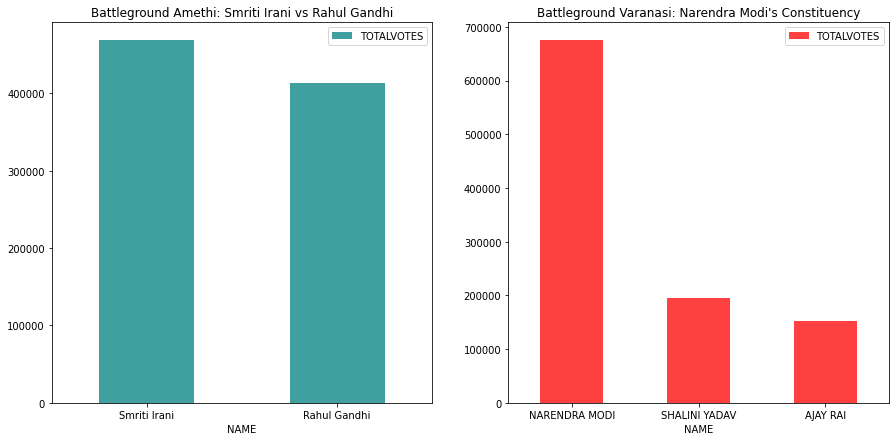

In [ ]:
#Battleground Amethi
amethi_df = dataset[dataset['CONSTITUENCY'] == 'AMETHI'][['NAME','TOTALVOTES']]

# Battleground Varanasi
varanasi_df = dataset[dataset['CONSTITUENCY'] == 'VARANASI'][['NAME','TOTALVOTES']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
amethi_df.plot(kind='bar',color = 'teal', ax=axes[0], alpha=0.75, rot=0, legend=True, title='Battleground Amethi: Smriti Irani vs Rahul Gandhi', x='NAME')
varanasi_df.plot(kind='bar', color = 'red', ax=axes[1], alpha=0.75, rot=0, legend=True, title="Battleground Varanasi: Narendra Modi's Constituency", x='NAME')
plt.savefig('AmethiXVaranasi.png')


*   This time things were different in Amethi. Smriti Irani defeated Rahul Gandhi by a substantial margin.
*   In Varanasi however the picture was similar with Narendra Modi winning the seat by a landslide.


##**West Bengal : Party-wise Vote Share**

In [ ]:
# Battleground West Bengal
bengal_df = pd.DataFrame(data=dataset[dataset['STATE'] == 'West Bengal'])
bengal_df_vote = pd.DataFrame(data = bengal_df.groupby('PARTY')['TOTALVOTES'].sum())
bengal_df_vote.sort_values(by='TOTALVOTES', ascending=False, inplace=True)
bengal_df_vote.reset_index(level=0, inplace=True)
bengal_df_vote['Category'] = bengal_df_vote.apply(sort_party, axis=1)
bengal_vote_count = bengal_df_vote.groupby('Category')['TOTALVOTES'].sum()

vote_share_top5 = bengal_df_vote.groupby('PARTY')['TOTALVOTES'].sum().nlargest(5).index.tolist()
# Visualize Party-wise vote share
bengal_fig = go.Figure(go.Pie(labels=bengal_vote_count.index, 
                                  values=bengal_vote_count.values,
                                  pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                                  marker=dict(line=dict(color="#000000", 
                                                        width=2))))
bengal_fig.update_layout(title_text='West Bengal : Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="#351f39",
                             title_font_family="Courier New",
                             title_font_color="#351f39")
bengal_fig.show();
plt.savefig('WestBengal-Partywise_VoteShare.png')

<Figure size 432x288 with 0 Axes>

##**How people voted in Bengal?**

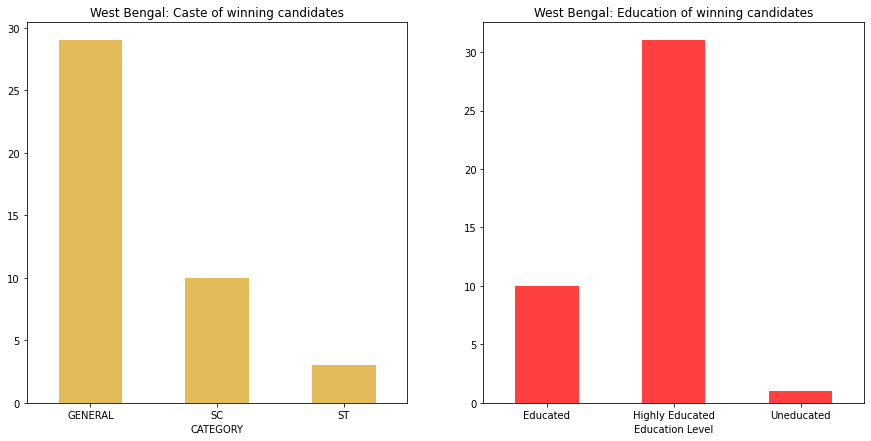

In [ ]:
# Create a dataframe containing the caste distribution of winners
winner_caste_bengal = bengal_df[bengal_df['WINNER'] == 1].groupby('CATEGORY')['WINNER'].size()
winner_caste_bengal_df= pd.DataFrame(data=winner_caste_bengal)
winner_caste_bengal_df.reset_index(level=0, inplace=True)

def education(data):
    if data['EDUCATION'] in ['5th Pass', 'Others', 'Illiterate', 'Not Available']:
        return 'Uneducated'
    elif data['EDUCATION'] in ['Graduate', 'Doctorate', 'Post Graduate']:
        return 'Highly Educated'
    else:
        return 'Educated'
    
bengal_df['Education Level'] = bengal_df.apply(education, axis=1)

winner_edu_bengal = bengal_df[bengal_df['WINNER'] == 1].groupby('Education Level')['WINNER'].size()
winner_edu_bengal_df= pd.DataFrame(data=winner_edu_bengal)
winner_edu_bengal_df.reset_index(level=0, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
winner_caste_bengal_df.plot(kind='bar',color = 'goldenrod', ax=axes[0], alpha=0.75, rot=0, legend=False, title='West Bengal: Caste of winning candidates', x='CATEGORY')
winner_edu_bengal_df.plot(kind='bar',color = 'red', ax=axes[1], alpha=0.75, rot=0, legend=False, title='West Bengal: Education of winning candidates', x='Education Level')
plt.savefig('WestBengal_CasteXEducation.png')

##**Names of Winners who dominated in resp cities**

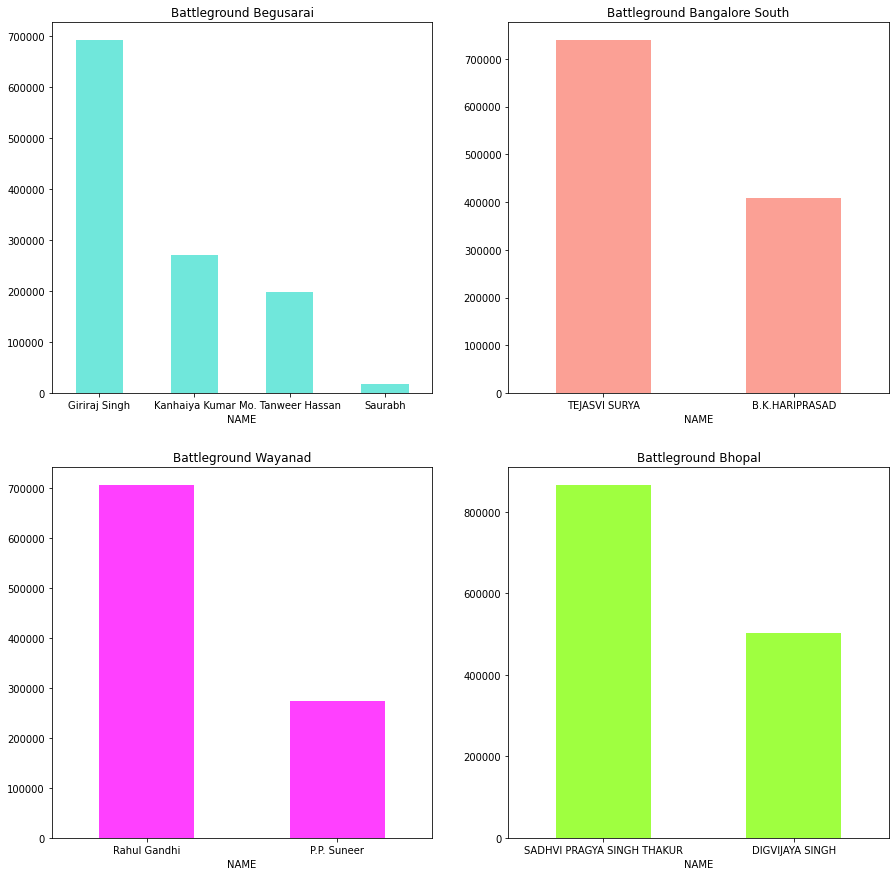

In [ ]:
begusarai_df = dataset[dataset['CONSTITUENCY'] == 'BEGUSARAI'][['NAME','TOTALVOTES']]
bangalore_df = dataset[dataset['CONSTITUENCY'] == 'BANGALORE SOUTH'][['NAME','TOTALVOTES']]
wayanad_df = dataset[dataset['CONSTITUENCY'] == 'WAYANAD'][['NAME','TOTALVOTES']]
bhopal_df = dataset[dataset['CONSTITUENCY'] == 'BHOPAL'][['NAME','TOTALVOTES']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
begusarai_df.plot(kind='bar',color = 'turquoise', ax=axes[0,0], alpha=0.75, rot=0, legend=False, title='Battleground Begusarai', x ='NAME')
bangalore_df.plot(kind='bar',color = 'salmon', ax=axes[0,1], alpha=0.75, rot=0, legend=False, title="Battleground Bangalore South", x ='NAME')
wayanad_df.plot(kind='bar',color = 'magenta', ax = axes[1,0], alpha=0.75, rot=0, legend=False, title='Battleground Wayanad', x ='NAME')
bhopal_df.plot(kind='bar',color = 'chartreuse', ax = axes[1,1], alpha=0.75, rot=0, legend=False, title="Battleground Bhopal", x ='NAME')
plt.savefig('Domination.png')


***Begusarai (Bihar):*** The Begusarai constituency, which is among the most talked about seats in Bihar, recorded a comparatively high turnout of 61.27%, as per the EC. The constituency has been under a microscope as it is witnessing the electoral debut of CPI candidate Kanhaiya Kumar, the controversial former JNUSU president who is pitted against BJP leader and union minister Giriraj Singh. The Mahagathbandhan's nominee is Tanweer Hasan (RJD)

***Bangalore South (Karnataka)***: The saffron bastion will see BJP's Tejasvi Surya take on Congress’ BK Hariprasad. After the untimely death of BJP leader and union minister Ananth Kumar who had held the constituency since 1996, BJP has fielded a young face in Tejasvi Surya. The late Ananth Kumar had beaten Infosys co-founder Nandan Nilekani, then a Congress candidate, in 2014.

***Wayanad (Kerala)***: Congress chief Rahul Gandhi contesting from this constituency apart from Congress' bastion in Amethi has made the relatively new seat becoming a national talking point. Against him are PP Suneer of CPI(M) and Thushar Vellappally of Bharath Dharma Jana Sena (an ally of BJP). Interestingly, Congress chief will be fighting with three namesakes: two Independent candidates, K.E. Rahul Gandhi and K.M. Shivprasad Gandhi, and K. Raghul Gandhi of the Agila India Makkal Kazhagam party.

***Bhopal (Madhya Pradesh)***: A BJP bastion, this constituency has taken centrestage ever since the BJP fielded Malegaon blast-accused Sadhvi Pragya from the seat against Congress veteran Digvijaya Singh. Singh has been CM of Madhya Pradesh and is contesting an election after a gap of almost 19 years, the last being the assembly election he contested in 2003. He was nominated to the Rajya Sabha in 2014 from Madhya Pradesh. The BJP however has consistently been winning the seat of Bhopal since 1989. BJP's Alok Sanjar is the sitting MP from the Bhopal Lok Sabha seat. What makes the contest especially interesting, however, is the fact that Digvijaya Singh was one of the most significant proposers of 'Saffron terror/Hindu terror' which cited the Malegaon blasts among others.

##**Naming parties with less than 10 candidates**

In [ ]:
# Labeling parties with less than 10 candidates as others
less_candidates = []
for i, j in dataset['PARTY'].value_counts().items():
    if j <= 10:
        less_candidates.append(i)
len(less_candidates)

def small_party(data):
    if data in less_candidates:
        return 'Other'
    return data
dataset['PARTY'] = dataset['PARTY'].apply(small_party)
dataset['PARTY'].value_counts()

BJP       420
INC       411
Other     247
IND       193
BSP       161
CPI(M)    100
VBA        47
AITC       47
SP         39
MNM        35
NTK        34
SHS        26
TDP        25
AAP        25
YSRCP      25
DMK        23
AIADMK     21
NCP        21
BJD        21
RJD        21
JnP        19
JD(U)      18
TRS        17
Name: PARTY, dtype: int64

In [ ]:
X = dataset.drop(['NAME', 'SYMBOL', 'WINNER', 'GENERALVOTES', 'POSTALVOTES', 'TOTALVOTES', 'OVER TOTAL ELECTORS IN CONSTITUENCY', 
             'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'Party New', 'CONSTITUENCY'], axis=1)
y = dataset['WINNER']
X.head()

,STATE,PARTY,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL ELECTORS
0,Telangana,BJP,MALE,52,52.0,ST,12th Pass,3099414,231450,1489790
1,Telangana,TRS,MALE,0,54.0,ST,Post Graduate,18477888,847000,1489790
2,Telangana,INC,MALE,3,52.0,ST,12th Pass,36491000,15300000,1489790
4,Uttar Pradesh,BJP,MALE,5,58.0,SC,Doctorate,74274036,8606522,1937690
5,Uttar Pradesh,BSP,MALE,0,47.0,SC,Post Graduate,133784385,22251891,1937690


##**Installing & Importing Tabulate Package/Module**

In [ ]:
#Tabulate is an open-source python package/module which is used to print tabular data in nicely formatted tables.
!pip install tabulate 

In [ ]:
from tabulate import tabulate

In [ ]:
z = [dataset['STATE'], dataset['NAME'], dataset['WINNER']]

In [ ]:
print(tabulate(z))
#format -->
#----------------
#State
#Name
#Winner Status
#----------------

--------------  ------------  -------------  ---------------------  ----------------  -------------  ---------------------------------  -----------------------  ---------------------  --------------------------  -------------  --------------------  -----------  ------------------------------  -------------------  -----------------  ---------------  ------------  ----------------------  -------------  -------------  ---------------------  -------------------------------  -------------------------------  --------------  -------------------  -----------------------  -------------  ------------  --------  -------------------  -----------------  ------------------------  -----------  --------------  -----------  -----------------  -------------------  --------------------  -------------  ----------------------  -----------  -------------  -----------------------  ----------  ----------------------  ----------  ---------------  ------------------------------  --------------  ----------------